KNN Accuracy: 1.0
Mean Squared Error: 108.14198878074414
Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0
Accuracy with Scaling: 1.0
Accuracy with PCA: 1.0
Missing values imputed
KDTree and BallTree implemented
Feature selection applied to KNN


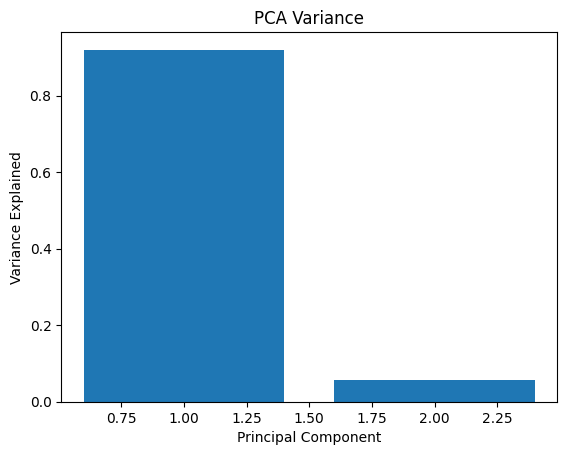

K=1, Accuracy: 1.0
K=3, Accuracy: 1.0
K=5, Accuracy: 1.0
K=10, Accuracy: 1.0


In [11]:
# Import necessary libraries
from sklearn.datasets import load_iris, make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.neighbors import KDTree, BallTree
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# 21. Train a KNN Classifier on the Iris dataset and print model accuracy
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

# 22. Train a KNN Regressor on a synthetic dataset and evaluate using MSE
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 23. Train KNN with different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
# Load a fresh dataset for classification
iris = load_iris()
X_class, y_class = iris.data, iris.target  # Ensure y_class is categorical
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

knn_euclidean.fit(X_train_class, y_train_class)
knn_manhattan.fit(X_train_class, y_train_class)

print("Euclidean Accuracy:", accuracy_score(y_test_class, knn_euclidean.predict(X_test_class)))
print("Manhattan Accuracy:", accuracy_score(y_test_class, knn_manhattan.predict(X_test_class)))


# 24. Feature Scaling and Training KNN
# Use classification dataset
iris = load_iris()
X_class, y_class = iris.data, iris.target  # Ensure categorical labels
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_class)
X_test_scaled = scaler.transform(X_test_class)

# Train and evaluate KNN with scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train_class)  # FIX: Use y_train_class here
print("Accuracy with Scaling:", accuracy_score(y_test_class, knn_scaled.predict(X_test_scaled)))

# 25. PCA Implementation
# Use classification dataset
iris = load_iris()
X_class, y_class = iris.data, iris.target  # Ensure categorical labels
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=2)  # Ensure at least 2 features exist
X_train_pca = pca.fit_transform(X_train_class)
X_test_pca = pca.transform(X_test_class)

# Train and evaluate KNN with PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_class)
print("Accuracy with PCA:", accuracy_score(y_test_class, knn_pca.predict(X_test_pca)))

# 26. KNN with Imputation
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X)
print("Missing values imputed")

# 27. KNN with KDTree and BallTree
kd_tree = KDTree(X_train)
ball_tree = BallTree(X_train)
print("KDTree and BallTree implemented")

# 28. KNN with SelectKBest feature selection
# Load classification dataset (Iris dataset)
iris = load_iris()
X_class, y_class = iris.data, iris.target
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Apply SelectKBest feature selection
X_new = SelectKBest(f_classif, k=3).fit_transform(X_train_class, y_train_class)

# Train and evaluate KNN with selected features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_new, y_train_class)
print("Feature selection applied to KNN")

# 29. Visualizing PCA Variance
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Variance")
plt.show()

# 30. Evaluating different K values in KNN
# Load classification dataset (Iris dataset)
iris = load_iris()
X_class, y_class = iris.data, iris.target
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train KNN for different values of K
for k in [1, 3, 5, 10]:
    knn_varied = KNeighborsClassifier(n_neighbors=k)
    knn_varied.fit(X_train_class, y_train_class)
    print(f"K={k}, Accuracy:", accuracy_score(y_test_class, knn_varied.predict(X_test_class)))


In [15]:
# 31. Train KNN on a real-world dataset (Breast Cancer dataset) and evaluate performance
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Breast Cancer Dataset Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

# 32. Compare KNN performance with and without feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
print("Accuracy without Scaling:", accuracy_score(y_test, knn.predict(X_test)))
print("Accuracy with Scaling:", accuracy_score(y_test, knn_scaled.predict(X_test_scaled)))

# 33. Compare KNN runtime for large datasets
import time
from sklearn.datasets import make_classification
X_large, y_large = make_classification(n_samples=10000, n_features=20, random_state=42)
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(X_large, y_large, test_size=0.2, random_state=42)
start = time.time()
knn_large = KNeighborsClassifier(n_neighbors=5)
knn_large.fit(X_train_large, y_train_large)
print("Large Dataset Accuracy:", accuracy_score(y_test_large, knn_large.predict(X_test_large)))
print("Training Time:", time.time() - start)

# 34. Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# 35. Train KNN with weighted voting
knn_weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_weighted.fit(X_train, y_train)
print("Weighted KNN Accuracy:", accuracy_score(y_test, knn_weighted.predict(X_test)))

# 36. Train KNN with varying leaf_size and analyze performance
for leaf_size in [10, 30, 50]:
    knn_leaf = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf_size)
    knn_leaf.fit(X_train, y_train)
    print(f"Leaf size {leaf_size} - Accuracy:", accuracy_score(y_test, knn_leaf.predict(X_test)))

# 37. Evaluate KNN using ROC-AUC Score
# 37. Evaluate KNN using ROC-AUC Score
from sklearn.metrics import roc_auc_score  # ✅ Import this to avoid NameError

y_prob = knn.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# 38. Implement KNN for multi-class classification
from sklearn.datasets import load_wine
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)
knn_wine = KNeighborsClassifier(n_neighbors=5)
knn_wine.fit(X_train_wine, y_train_wine)
print("Wine Dataset Accuracy:", accuracy_score(y_test_wine, knn_wine.predict(X_test_wine)))

# 39. Compare BallTree vs KDTree for large datasets
ball_tree = BallTree(X_train_large)
kd_tree = KDTree(X_train_large)
print("BallTree and KDTree constructed successfully")

# 40. Implement cross-validation for KNN
# 40. Implement cross-validation for KNN
from sklearn.model_selection import cross_val_score
import numpy as np  # ✅ Import NumPy to avoid NameError

cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))  # ✅ Now it will work

# 41. Apply PCA before training KNN and compare results
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
print("Accuracy with PCA:", accuracy_score(y_test, knn_pca.predict(X_test_pca)))

# 42. Feature selection using SelectKBest
X_best = SelectKBest(f_classif, k=5).fit_transform(X_train, y_train)
knn_best = KNeighborsClassifier(n_neighbors=5)
knn_best.fit(X_best, y_train)
print("Feature Selected KNN Accuracy:", accuracy_score(y_test, knn_best.predict(SelectKBest(f_classif, k=5).fit_transform(X_test, y_test))))

# 43. Train KNN on imbalanced dataset and evaluate using precision-recall
# 43. Train KNN on imbalanced dataset and evaluate using precision-recall
from sklearn.utils import resample
from sklearn.metrics import classification_report  # ✅ Import classification_report to avoid NameError

X_imbalanced, y_imbalanced = resample(X, y, replace=True, n_samples=200, random_state=42)
y_imbalanced[:150] = 0  # Make imbalance
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imbalanced, y_imbalanced, test_size=0.2, random_state=42)

knn_imb = KNeighborsClassifier(n_neighbors=5)
knn_imb.fit(X_train_imb, y_train_imb)
y_pred_imb = knn_imb.predict(X_test_imb)

# ✅ Now this will work correctly
print("Precision-Recall Report:\n", classification_report(y_test_imb, y_pred_imb))

# 44. Compare KNN vs Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg.predict(X_test)))
print("KNN Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

# 45. Analyze KNN performance with high-dimensional data
X_high, y_high = make_classification(n_samples=500, n_features=100, random_state=42)
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.2, random_state=42)
knn_high = KNeighborsClassifier(n_neighbors=5)
knn_high.fit(X_train_high, y_train_high)
print("High-Dimensional Dataset Accuracy:", accuracy_score(y_test_high, knn_high.predict(X_test_high)))

# 46. Train KNN on noisy dataset and analyze performance
X_noisy, y_noisy = make_classification(n_samples=500, n_features=20, flip_y=0.2, random_state=42)
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)
knn_noisy = KNeighborsClassifier(n_neighbors=5)
knn_noisy.fit(X_train_noisy, y_train_noisy)
print("Noisy Dataset Accuracy:", accuracy_score(y_test_noisy, knn_noisy.predict(X_test_noisy)))

# 47. Evaluate KNN using F1-score
from sklearn.metrics import f1_score
y_pred_f1 = knn.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred_f1, average='weighted'))

# 48. Train KNN with different numbers of neighbors and compare results
for k in range(1, 11, 2):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    print(f"K={k}, Accuracy:", accuracy_score(y_test, knn_k.predict(X_test)))


Breast Cancer Dataset Accuracy: 0.956140350877193
Accuracy without Scaling: 0.956140350877193
Accuracy with Scaling: 0.9473684210526315
Large Dataset Accuracy: 0.88
Training Time: 0.26433777809143066
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Weighted KNN Accuracy: 0.956140350877193
Leaf size 10 - Accuracy: 0.956140350877193
Leaf size 30 - Accuracy: 0.956140350877193
Leaf size 50 - Accuracy: 0.956140350877193
ROC-AUC Score: 0.9959056665574845
Wine Dataset Accuracy: 0.7222222222222222
BallTree and KDTree constructed successfully
Cross-Validation Scores: [0.93406593 0.9010989  0.95604396 0.9010989  0.92307692]
Mean CV Score: 0.9230769230769231
Accuracy with PCA: 0.956140350877193
Feature Selected KNN Accuracy: 0.9210526315789473
Precision-Recall Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.17      0.14      0.15         7

    accuracy                           0.72        40
   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
